## Exercises and supplementary notes - Week 4, Session AM1

We'll be using the same tools that we used last week for this session.

- [pandas](pandas.pydata.org) for data handling (our dataframe library)
- [seaborn](seaborn.pydata.org) for _nice_ data visualization
- [scikit-learn](scikit-learn.org) an extensive machine learning library.
- [numpy](numpy.org) - a fundamental maths library best used by people with a strong maths background.  We won't explore it much today, but it does have some useful methods that we'll need.  It underlies all other mathematical and plotting tools that we use in Python.

Shortly we'll also by trying out:
- [statsmodel](statsmodel.org) - this is another library for doing statistical fitting.  It generates R-like reports.
- We'll also being trying out two new parts of scikit-learn sklearn.cross_decomposition and decomposition for PLS and PCA 

We'll be using scikit-learn over the next few weeks, and it's well worth reading the documentation and high level descriptions.

As before, the aim is to get familiar with code-sharing workflows - so we will be doing pair programming for the duration of the day! _You will probably want to take a moment to look at the documentation of the libraries above - especially pandas_

The other useful resource is Stack Overflow - if you have a question that sounds like 'how do I do {x}' then someone will probably have answered it on SO. Questions are also tagged by library so if you have a particular pandas question you can do something like going to https://stackoverflow.com/questions/tagged/pandas (just replace the 'pandas' in the URL with whatever library you're trying to use.

Generally answers on SO are probably a lot closer to getting you up and running than the documentation. Once you get used to the library then the documentation is generally a quicker reference. We will cover strategies for getting help in class.

Topics that we'll be discussing in this session include:
Robust Regression - http://scikit-learn.org/stable/modules/linear_model.html#robustness-regression-outliers-and-modeling-errors


## Git links

We will be working through using GitHub and GitKraken to share code between pairs. We will go through all the workflow in detail in class but here are some useful links for reference:

- GitKraken interface basics: https://support.gitkraken.com/start-here/interface
- Staging and committing (save current state -> local history): https://support.gitkraken.com/working-with-commits/commits
- Pushing and pulling (sync local history <-> GitHub history): https://support.gitkraken.com/working-with-repositories/pushing-and-pulling
- Forking and pull requests (request to sync your GitHub history <-> someone else's history - requires a _review_):
  - https://help.github.com/articles/about-forks/
  - https://help.github.com/articles/creating-a-pull-request-from-a-fork/

## Exercise:  Apply statsmodel to the synthetic drilling hole data.

Statsmodel has an API with similarities to scikit-learn, but uses statstical language (particularly as used in financial and economic models) rather than the terminology that is more common in machine learning.  Statsmodel refers to endogeneous and exogeneous variables.  In many ways they reflect the differences in philosophy between how people with a statistics modelling background work, vs people with machine learning/computing backgrounds.  Scikit-learn has a focus on training and validation error curves and cross-validation to choose a model, whereas statsmodel provides metrics for hypothesis tests and goodness-of-fit.

We'll briefly look at a typical report that statsmodel generates after fitting.



In [41]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

from week4_help import create_composition_dataframe, create_observations, create_templates_matrix

templates = create_templates_matrix()
compositions = create_composition_dataframe(150)
observations = create_observations(compositions, templates)

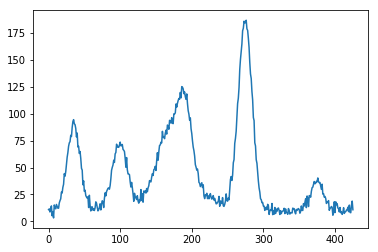

In [42]:
plt.plot(observations[:, 3])

In [43]:
X = templates
y = observations[:, 3]
model = sm.OLS(y, X).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.841e+04
Date:                Tue, 09 Oct 2018   Prob (F-statistic):               0.00
Time:                        13:13:44   Log-Likelihood:                -1071.6
No. Observations:                 426   AIC:                             2153.
Df Residuals:                     421   BIC:                             2173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            32.4008      0.139    233.530      0.000      32.128      32.673
x2             4.8317      0.145     33.295      0.000       4.546       5.117
x3            20.5171      0.198    103.790      0.000      20.129      20.906
x4             4.9458      0.404     12.246      0.000       4.152       5.740
const         10.1201      0.222     45.532      0.000       9.683      10.557
==============================================================================
Omnibus:                        1.894   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.841
Skew:                           0.161   Prob(JB):                        0.398
Kurtosis:                       2.989   Cond. No.                         4.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's compare this against truth:

In [45]:
compositions.head()

,Quartz,Dilithium,Kryptonite,Unobtainium
0,5.000000,33.734294,20.051871,5.399245
1,5.000000,34.685407,22.509373,0.145264
2,5.000000,33.691945,22.478866,4.435538
3,32.249339,5.000000,20.669148,5.241627
4,29.202036,27.327283,20.710555,3.489549


## Exercise Look at the correlation matrix

Lets look at the correlation matrix for the features.  As you've seen, the feature variables are highly correlated with each other.  In real-world situations with more noise than this synthetic data this can cause linear least squares to fail.  Shortly we'll look at dimension reduction in the case of highly correlated variables, but lets look at the correlation visually.

Seaborn's heatmap is useful for this, but it can be very slow.  Matplotlib's matshow is faster, try this if heatmap doesn't work well on your machine.

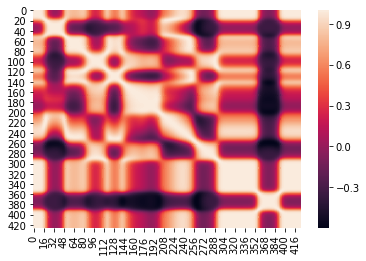

In [46]:
import seaborn as sns
correlation_matrix = np.corrcoef(X)
sns.heatmap(correlation_matrix)

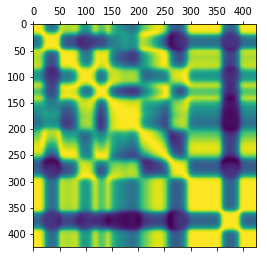

In [47]:
plt.matshow(correlation_matrix)

## Exercise:  Apply PCA to observations matrix.

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(observations)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
print(pca.components_)

[[ 0.04356901  0.04441032  0.04486882 ...  0.08874902  0.08618533
   0.09328089]
 [ 0.14093176  0.14811396  0.1402265  ...  0.06585451  0.05540338
  -0.06034275]
 [ 0.03005075  0.08117669  0.08143129 ... -0.06514712 -0.13922057
   0.05005523]
 ...
 [ 0.02451159 -0.04774677  0.05408418 ... -0.03501358 -0.06885206
   0.00726261]
 [-0.03701721  0.01998606 -0.12339401 ...  0.11767886  0.01833735
   0.08830087]
 [ 0.08597955 -0.05745995  0.01891607 ...  0.00737672 -0.09656674
   0.08652666]]


Oops!  Can you see what's wrong here?  The components should have the same length as the orginal observations.  These components have only 50 elements.  This means that the observations array isn't organised properly for PCA fitting.  It thinks that we have ~400 observations, each with 50 features.  To fix this we should transpose the matrix.

In [50]:
transposed_observations = observations.transpose()

In [51]:
pca.fit(transposed_observations)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
print(pca.components_)

[[-5.78987874e-04 -5.13463238e-04 -4.12026292e-04 ... -4.39840618e-04
  -2.21400840e-04  1.24469178e-04]
 [-3.20204687e-03  1.52245623e-03 -7.89177877e-04 ... -1.21231112e-03
  -3.30263693e-03 -3.67739212e-03]
 [ 1.78277824e-02 -5.87021932e-03  1.06311315e-04 ... -1.60123686e-03
   2.81856041e-03 -1.79621843e-04]
 ...
 [ 3.89525632e-03  3.96883291e-03 -1.40486631e-02 ...  3.41528003e-02
   2.97872963e-02 -2.87862988e-02]
 [ 8.82041236e-03 -2.23163296e-02 -9.23304956e-02 ... -3.76783244e-04
  -1.17443066e-01  6.27055760e-02]
 [-2.28986030e-02 -1.01964331e-01 -2.14187132e-02 ...  3.71879922e-04
  -1.02654439e-02  5.05762043e-02]]


That's better!  We clearly have many more elements in these component arrays now.

Let's look at the explained variance.  Warning:  Older documentation will tell you to do this. But Python is a living project and this now returns abstract quantities ("eigenvalues") that are related to the variances, but are not variances.

In [53]:
print(pca.explained_variance_)

[1.50295476e+05 1.95388466e+04 6.46458273e+02 2.67659009e+02
 6.20436882e+01 6.03735309e+01 5.86986570e+01 5.75539133e+01
 5.59864336e+01 5.49602111e+01 5.42284546e+01 5.33005057e+01
 5.23914273e+01 5.11941665e+01 5.06725681e+01]


Nowadays we should use explained_variance_ratio, like this:

In [54]:
print (pca.explained_variance_ratio_)

[8.61734793e-01 1.12028016e-01 3.70653595e-03 1.53465085e-03
 3.55733959e-04 3.46157938e-04 3.36554874e-04 3.29991366e-04
 3.21004058e-04 3.15120104e-04 3.10924502e-04 3.05604010e-04
 3.00391714e-04 2.93527095e-04 2.90536456e-04]


This says that the first component was able to account for about 86% of the variation, and the two following components account for about 1% and then less than 1% each.

PCA has compressed 89% of the variation in ~400 features into just two transformed features!

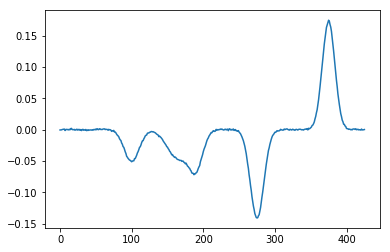

In [55]:
plt.plot(pca.components_[0])

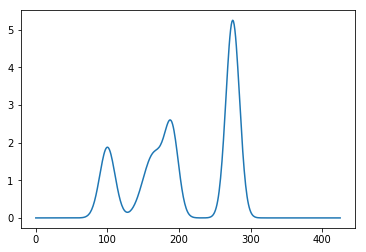

In [56]:
plt.plot(templates[:,0])

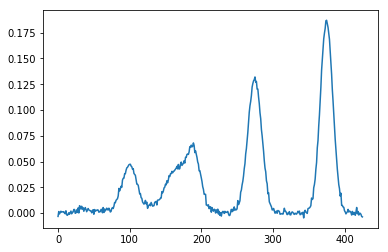

In [57]:
plt.plot(pca.components_[1])

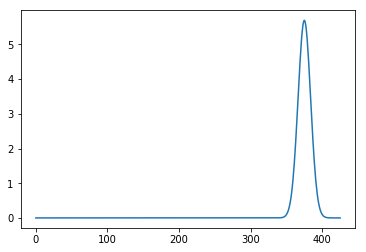

In [58]:
plt.plot(templates[:,1])

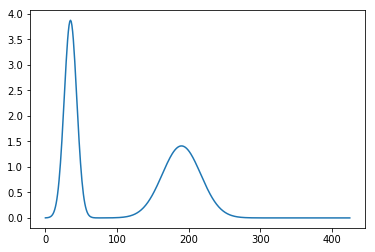

In [59]:
plt.plot(templates[:,2])

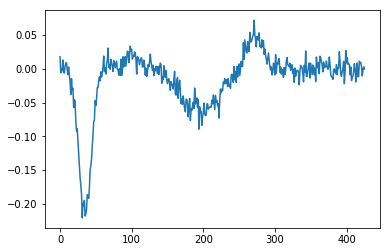

In [60]:
plt.plot(pca.components_[2])

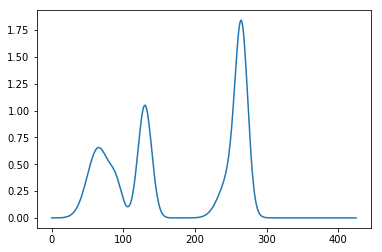

In [61]:
plt.plot(templates[:, 3])

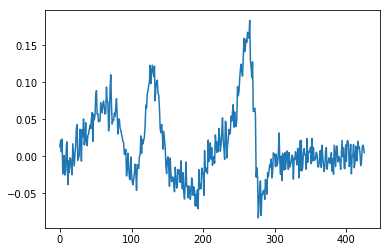

In [62]:
plt.plot(pca.components_[3])

This looks better than I expected, for unobtainium.  But there's a good chance that PCA regression will struggle to predict unobtainium well, especially when there isn't very much present.

We can plot explained variance like this:

Text(0, 0.5, 'cumulative explained variance')

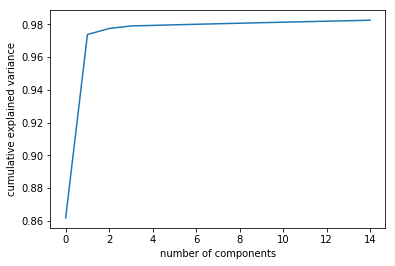

In [63]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We seem to hit a sweet spot at about 2 components, and then explained variance only gradually improves after this point.  This is a good result, given that we know that we know these samples only contain four minerals, and all other variance is from noise.

How do we look at the transformed data?  We use the transform method to find the "scores" associated with each observation.  These are new observations in the new feature space that PCA has found.  Each element in observations_in_pc_space has 15 elements in it, being the reduced feature space.

In [64]:
observations_in_pc_space = pca.transform(transposed_observations)

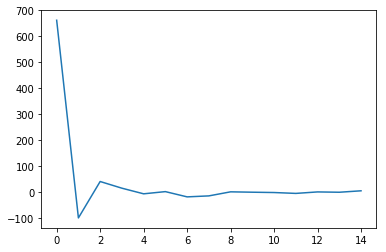

In [65]:
plt.plot(observations_in_pc_space[0])

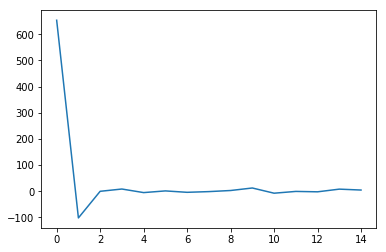

In [66]:
plt.plot(observations_in_pc_space[2])

We'd like to be able to plot the scores against each other.  Let's plot PC1 against PC2 for all observations.

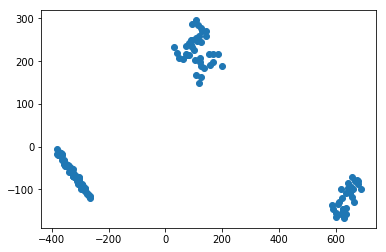

In [67]:
plt.plot(observations_in_pc_space[:, 0],
        observations_in_pc_space[:,1],
        'o')

Oh look!  There are clusters!  What about PC2 and PC3?

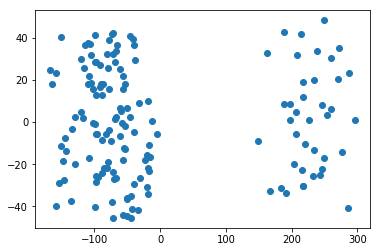

In [68]:
plt.plot(observations_in_pc_space[:, 1],
        observations_in_pc_space[:,2],
        'o')

Try to study the Octane dataset in the same manner!  You'll need to disregard the column with the octane ratings, as we're only interested in the spectra.

In [69]:
import os
from os import path
import pandas as pd

current_folder = os.getcwd()

print ('Current working folder: ' + current_folder)

file_name = 'octane.xlsx'
sheet_name = 'Sheet1'

df = pd.ExcelFile(path.join(current_folder, file_name)).parse(sheet_name)
#df.set_index('Sample name', inplace=True)
octane = df.drop(columns=['Octane number','Sample name'])
octane.head()

Current working folder: C:\Users\tdavies\Desktop\Data_Science\CORE\04-multivariate-analysis\notebooks


,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,...,1532,1534,1536,1538,1540,1542,1544,1546,1548,1550
0,-0.001835,-0.001496,-0.001009,-0.000360,0.000466,0.001502,0.002798,0.004410,0.006397,0.008884,...,0.040192,0.038423,0.036768,0.035235,0.033835,0.032575,0.031462,0.030508,0.029727,0.029127
1,-0.001627,-0.001261,-0.000748,-0.000065,0.000818,0.001943,0.003354,0.005088,0.007170,0.009686,...,0.041009,0.039185,0.037459,0.035842,0.034354,0.033023,0.031876,0.030927,0.030179,0.029622
2,-0.000465,-0.000330,0.000181,0.001121,0.002465,0.004140,0.006075,0.008238,0.010632,0.013356,...,0.044729,0.043308,0.041914,0.040548,0.039222,0.037938,0.036706,0.035545,0.034493,0.033604
3,-0.001443,-0.001094,-0.000596,0.000082,0.000972,0.002114,0.003545,0.005299,0.007395,0.009922,...,0.045022,0.043128,0.041327,0.039629,0.038052,0.036621,0.035361,0.034299,0.033446,0.032808
4,-0.001607,-0.001155,-0.000548,0.000244,0.001259,0.002551,0.004177,0.006188,0.008622,0.011594,...,0.038111,0.036470,0.034925,0.033475,0.032138,0.030943,0.029920,0.029091,0.028468,0.028044


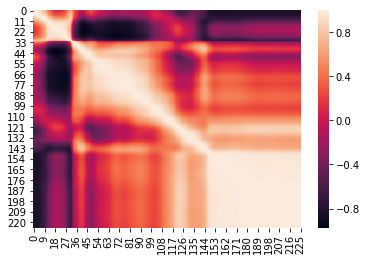

In [70]:
import seaborn as sns
import numpy as np
correlation_matrix = np.corrcoef(octane.transpose())
sns.heatmap(correlation_matrix)

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(octane)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [72]:
print(pca.components_)

[[-0.00271057 -0.00271771 -0.00273213 ...  0.13246092  0.13279293
   0.13315702]
 [-0.00113204 -0.00067928 -0.00019278 ...  0.03848252  0.0397517
   0.04094694]
 [ 0.00118549  0.00111014  0.00105669 ... -0.04704323 -0.04593434
  -0.04483806]
 ...
 [-0.04816922 -0.02916514 -0.02101385 ...  0.01028029  0.0242652
   0.0396711 ]
 [ 0.17549073  0.17653637  0.16933512 ... -0.05687186 -0.04433678
  -0.03075044]
 [ 0.02906475  0.03319611  0.03357743 ...  0.07954511  0.09175897
   0.10495417]]


In [73]:
pca.fit(octane)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [74]:
print(pca.explained_variance_)

[1.32644366e-01 8.74600560e-03 1.36196882e-03 7.44241943e-04
 1.08792892e-04 4.89322741e-05 3.72713952e-05 1.71252889e-05
 7.45815420e-06 4.01558724e-06 3.16558141e-06 2.53163027e-06
 1.31396180e-06 9.10083585e-07 6.47673753e-07]


In [75]:
print (pca.explained_variance_ratio_)

[9.22872309e-01 6.08502766e-02 9.47588911e-03 5.17805844e-03
 7.56925832e-04 3.40445976e-04 2.59315488e-04 1.19149085e-04
 5.18900589e-05 2.79384219e-05 2.20245119e-05 1.76138010e-05
 9.14188060e-06 6.33190057e-06 4.50618589e-06]


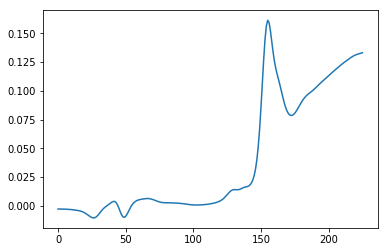

In [76]:
import matplotlib.pyplot as plt
plt.plot(pca.components_[0])

Text(0, 0.5, 'cumulative explained variance')

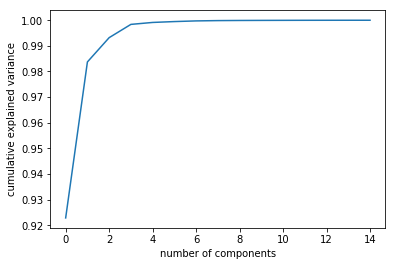

In [77]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [78]:
observations_in_pc_space = pca.transform(octane)

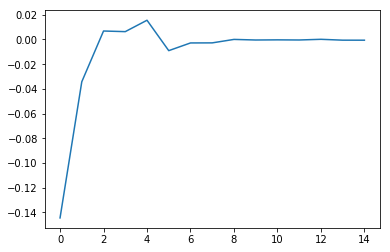

In [79]:
plt.plot(observations_in_pc_space[0])

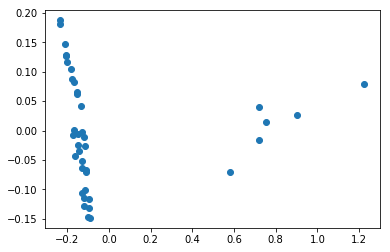

In [80]:
plt.plot(observations_in_pc_space[:, 0],
        observations_in_pc_space[:,1],
        'o')

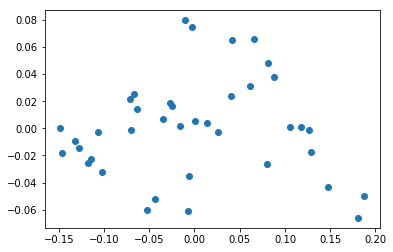

In [81]:
plt.plot(observations_in_pc_space[:, 1],
        observations_in_pc_space[:,2],
        'o')